In [5]:
import pickle
import numpy as np
from collections import defaultdict
import config
import time
import datetime
import torch
import numpy as np
import random
import pickle
from tqdm import tqdm
from model import SessionGraph
from utils import handle_adj, Data

In [ ]:
dataset = 'Tmall'

fre = defaultdict(int)
seq = pickle.load(open('./datasets/'+dataset + '/all_train_seq.txt', 'rb'))
nodes = set()
lens = []
i = 0
for s in seq:
    print(s)
    i+=1
    if i==1000:
        break

In [8]:
def handle_data(inputData, train_len=None):
    len_data = [len(nowData) for nowData in inputData]
    if train_len is None:
        max_len = max(len_data)
    else:
        max_len = train_len
    # reverse the sequence
    us_pois = [list(reversed(upois)) + [0] * (max_len - le) if le < max_len else list(reversed(upois[-max_len:]))
               for upois, le in zip(inputData, len_data)]
    us_msks = [[1] * le + [0] * (max_len - le) if le < max_len else [1] * max_len
               for le in len_data]
    return us_pois, us_msks, max_len

In [27]:
def mean_length(data):
    lengths = [len(nowData) for nowData in data]
    cnts = []
    for u_input in tqdm(data):
        node = np.unique(u_input)
        items = node.tolist()
        for i in range(len(items)):
            cnt = 0
            for j in range(i-70,i+70):
                if j < 0 or j == i or j >= len(items) or items[i] == 0 or items[j]==0:
                    continue
                x = tuple(sorted([items[i], items[j]]))
                if x in seq2idx.keys():
                    cnt += 1
            cnts.append(cnt)
    return lengths, cnts

In [29]:
dataset = "diginetica"
adj = pickle.load(open('datasets/' +  dataset + '/adj_' + str(12) + '.pkl', 'rb'))
seq2fre = pickle.load(open('datasets/' +  dataset + '/seq2fre_' + str(12) + '.pkl', 'rb'))
seq2idx = pickle.load(open('datasets/' +  dataset + '/seq2idx_' + str(12) + '.pkl', 'rb'))
train_data = pickle.load(open('datasets/' +  dataset + '/train.txt', 'rb'))
test_data = pickle.load(open('datasets/' +  dataset + '/test.txt', 'rb'))
diginetica_train_length, diginetica_train_cnts = mean_length(train_data[0])
diginetica_test_lengths, diginetica_test_cnts = mean_length(test_data[0])
print(np.mean(diginetica_train_length), np.mean(diginetica_train_cnts), np.mean(diginetica_test_lengths), np.mean(diginetica_test_cnts))

100%|██████████| 60858/60858 [00:03<00:00, 16840.59it/s]


4.132768565749788 4.4360383544656825 4.034736599953991 2.4769896259276085


In [30]:
dataset = "Nowplaying"
adj = pickle.load(open('datasets/' +  dataset + '/adj_' + str(12) + '.pkl', 'rb'))
seq2fre = pickle.load(open('datasets/' +  dataset + '/seq2fre_' + str(12) + '.pkl', 'rb'))
seq2idx = pickle.load(open('datasets/' +  dataset + '/seq2idx_' + str(12) + '.pkl', 'rb'))
train_data = pickle.load(open('datasets/' +  dataset + '/train.txt', 'rb'))
test_data = pickle.load(open('datasets/' +  dataset + '/test.txt', 'rb'))
Nowplaying_train_lengths, Nowplaying_train_cnts = mean_length(train_data[0])
Nowplaying_test_lengths, Nowplaying_test_cnts = mean_length(test_data[0])
print(np.mean(Nowplaying_train_lengths), np.mean(Nowplaying_train_cnts), np.mean(Nowplaying_test_lengths), np.mean(Nowplaying_test_cnts))

100%|██████████| 89824/89824 [00:08<00:00, 10629.00it/s]


5.53095223093551 5.743771687636101 5.547370413252583 1.7739573519685425


In [31]:
dataset = "Tmall"
adj = pickle.load(open('datasets/' +  dataset + '/adj_' + str(12) + '.pkl', 'rb'))
seq2fre = pickle.load(open('datasets/' +  dataset + '/seq2fre_' + str(12) + '.pkl', 'rb'))
seq2idx = pickle.load(open('datasets/' +  dataset + '/seq2idx_' + str(12) + '.pkl', 'rb'))
train_data = pickle.load(open('datasets/' +  dataset + '/train.txt', 'rb'))
test_data = pickle.load(open('datasets/' +  dataset + '/test.txt', 'rb'))
Tmall_train_lengths, Tmall_train_cnts = mean_length(train_data[0])
Tmall_test_lenghts, Tmall_test_cnts = mean_length(test_data[0])
print(np.mean(Tmall_train_lengths), np.mean(Tmall_train_cnts), np.mean(Tmall_test_lenghts), np.mean(Tmall_test_cnts))

100%|██████████| 25898/25898 [00:04<00:00, 5796.88it/s]


6.470478381179043 4.930541730935321 14.304540891188509 1.0763284862152658


(0.0, 40.0)

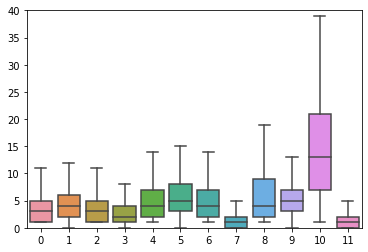

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# df = pd.DataFrame({"diginetica_train_length":diginetica_train_length, "diginetica_train_cnts":diginetica_train_cnts,\
#                   "diginetica_test_lengths":diginetica_test_lengths, "diginetica_test_cnts":diginetica_test_cnts,\
#                   "Nowplaying_train_lengths":Nowplaying_train_lengths, "Nowplaying_train_cnts":Nowplaying_train_cnts,\
#                   "Nowplaying_test_lengths":Nowplaying_test_lengths, "Nowplaying_test_cnts":Nowplaying_test_cnts,\
#                   "Tmall_train_lengths":Tmall_train_lengths, "Tmall_train_cnts":Tmall_train_cnts,
#                   "Tmall_test_lenghts":Tmall_test_lenghts, "Tmall_test_cnts":Tmall_test_cnts})

ax = sns.boxplot(data=[diginetica_train_length, diginetica_train_cnts, diginetica_test_lengths, diginetica_test_cnts,\
                 Nowplaying_train_lengths, Nowplaying_train_cnts, Nowplaying_test_lengths, Nowplaying_test_cnts,\
                 Tmall_train_lengths, Tmall_train_cnts, Tmall_test_lenghts, Tmall_test_cnts],fliersize=0)
ax.set_ylim(0,40)